1. Data Preparation
2. Exploratory Data Analysis
3. Macroeconomic factors forecasting
4. Probability of Default modelling
5. Loss Given Default modelling
5. Exposure at Default modelling
6. Expected Credit Loss calculation for 6 years






In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle
#!kaggle datasets download -d justjun0321/prosperloandata
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip


/content/gdrive/My Drive/Kaggle


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,...,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,...,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# **Data Preparation**

## **Drop Unuseful Columns**

We need to choose important features of the data since it has so many features. We will choose Loan-Payment related data and customer demographic info data.

In [5]:
features = {"LoanStatus", 
"ListingKey",
"CreditGrade",
"Term",
"LoanCurrentDaysDelinquent",
"ClosedDate",
"LoanOriginationDate",
"IncomeRange",
"DebtToIncomeRatio",
"LoanOriginalAmount",
"LP_CustomerPrincipalPayments",
"LP_InterestandFees",
"LP_GrossPrincipalLoss",
"BorrowerState",
"Occupation",
"EmploymentStatus",
"IsBorrowerHomeowner"}

df = df[features]
df.head()

,LP_GrossPrincipalLoss,ListingKey,BorrowerState,LP_InterestandFees,LP_CustomerPrincipalPayments,LoanStatus,IsBorrowerHomeowner,Term,DebtToIncomeRatio,LoanOriginationDate,ClosedDate,EmploymentStatus,CreditGrade,LoanCurrentDaysDelinquent,Occupation,LoanOriginalAmount,IncomeRange
0,0.0,1021339766868145413AB3B,CO,1971.14,9425.00,Completed,True,36,0.17,2007-09-12 00:00:00,2009-08-14 00:00:00,Self-employed,C,0,Other,9425,"$25,000-49,999"
1,0.0,10273602499503308B223C1,CO,0.00,0.00,Current,False,36,0.18,2014-03-03 00:00:00,NaN,Employed,NaN,0,Professional,10000,"$50,000-74,999"
2,0.0,0EE9337825851032864889A,GA,1185.63,3001.00,Completed,False,36,0.06,2007-01-17 00:00:00,2009-12-17 00:00:00,Not available,HR,0,Other,3001,Not displayed
3,0.0,0EF5356002482715299901A,GA,1052.11,4091.09,Current,True,36,0.15,2012-11-01 00:00:00,NaN,Employed,NaN,0,Skilled Labor,10000,"$25,000-49,999"
4,0.0,0F023589499656230C5E3E2,MN,1256.63,1563.22,Current,True,36,0.26,2013-09-20 00:00:00,NaN,Employed,NaN,0,Executive,15000,"$100,000+"


## **Cleansing Numerical Values**

In [6]:
df.describe()

,LP_GrossPrincipalLoss,LP_InterestandFees,LP_CustomerPrincipalPayments,Term,DebtToIncomeRatio,LoanCurrentDaysDelinquent,LoanOriginalAmount
count,113937.000000,113937.000000,113937.000000,113937.000000,105383.000000,113937.000000,113937.00000
mean,700.446342,1077.542901,3105.536588,40.830248,0.275947,152.816539,8337.01385
std,2388.513831,1183.414168,4069.527670,10.436212,0.551759,466.320254,6245.80058
min,-94.200000,-2.349900,0.000000,12.000000,0.000000,0.000000,1000.00000
25%,0.000000,274.870000,500.890000,36.000000,0.140000,0.000000,4000.00000
50%,0.000000,700.840100,1587.500000,36.000000,0.220000,0.000000,6500.00000
75%,0.000000,1458.540000,4000.000000,36.000000,0.320000,0.000000,12000.00000
max,25000.000000,15617.030000,35000.000000,60.000000,10.010000,2704.000000,35000.00000


In [7]:
df1 = df.select_dtypes(include=[np.number])
df1.isnull().sum()

LP_GrossPrincipalLoss              0
LP_InterestandFees                 0
LP_CustomerPrincipalPayments       0
Term                               0
DebtToIncomeRatio               8554
LoanCurrentDaysDelinquent          0
LoanOriginalAmount                 0
dtype: int64

In [8]:
# Replace null in DebtToIncomeRatio with mean

mean = df['DebtToIncomeRatio'].mean()
df['DebtToIncomeRatio'] = df['DebtToIncomeRatio'].fillna(mean)

df1 = df.select_dtypes(include=[np.number])
df1.isnull().sum()

LP_GrossPrincipalLoss           0
LP_InterestandFees              0
LP_CustomerPrincipalPayments    0
Term                            0
DebtToIncomeRatio               0
LoanCurrentDaysDelinquent       0
LoanOriginalAmount              0
dtype: int64

## **Cleansing Categorical Features**

At a glance, we can see that we have some non-valuable data from our categorical value, we need to make it as "Other" for the sake of modelling. Beside that, we also can simplify the value if it is possible.

In [9]:
df2 = df.select_dtypes(exclude=[np.number])
cat_var = list(df2.columns.values)
print('cat_var : ', len(cat_var),'\n')

print(df2.isnull().sum(), '\n')

df_cat = pd.DataFrame(columns=['Var','Total','Element','Unique'])
for i in cat_var:
  df_cat = df_cat.append({'Var':i,'Total':df[i].count(),'Element':df[i].unique(),'Unique':len(list(df[i].unique()))},ignore_index=True)

df_cat

cat_var :  10 

ListingKey                 0
BorrowerState           5515
LoanStatus                 0
IsBorrowerHomeowner        0
LoanOriginationDate        0
ClosedDate             58848
EmploymentStatus        2255
CreditGrade            84984
Occupation              3588
IncomeRange                0
dtype: int64 



,Var,Total,Element,Unique
0,ListingKey,113937,"[1021339766868145413AB3B, 10273602499503308B22...",113066
1,BorrowerState,108422,"[CO, GA, MN, NM, KS, CA, IL, MD, nan, AL, AZ, ...",52
2,LoanStatus,113937,"[Completed, Current, Past Due (1-15 days), Def...",12
3,IsBorrowerHomeowner,113937,"[True, False]",2
4,LoanOriginationDate,113937,"[2007-09-12 00:00:00, 2014-03-03 00:00:00, 200...",1873
5,ClosedDate,55089,"[2009-08-14 00:00:00, nan, 2009-12-17 00:00:00...",2803
6,EmploymentStatus,111682,"[Self-employed, Employed, Not available, Full-...",9
7,CreditGrade,28953,"[C, nan, HR, AA, D, B, E, A, NC]",9
8,Occupation,110349,"[Other, Professional, Skilled Labor, Executive...",68
9,IncomeRange,113937,"[$25,000-49,999, $50,000-74,999, Not displayed...",8


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

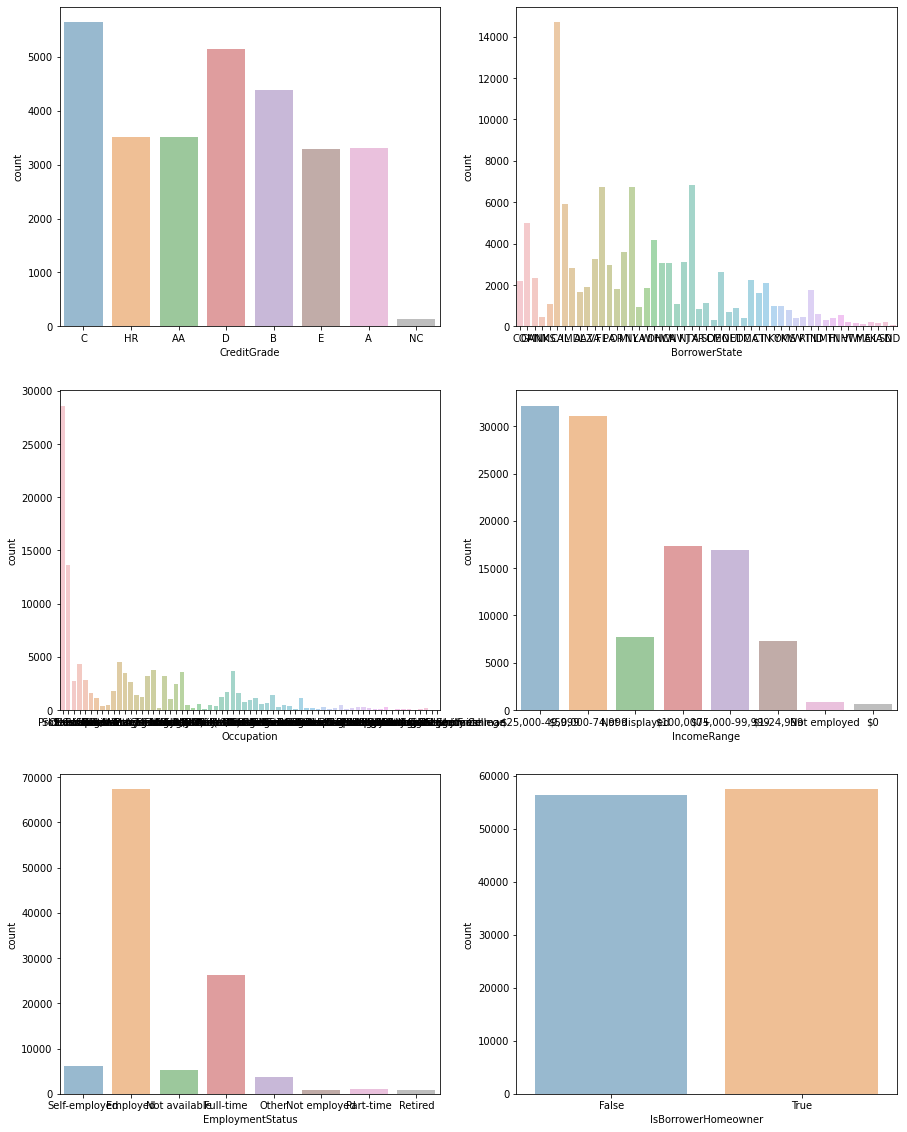

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows,ncols, figsize=(15,20),sharex=False)

cat_var = ['CreditGrade','BorrowerState','Occupation','IncomeRange','EmploymentStatus','IsBorrowerHomeowner']
i=0
for j in range(nrows):
  for k in range(ncols):
    sns.countplot(df[cat_var[i]],
                  ax=axes[j,k],
                  alpha=0.5)
    i+=1

From graphs above we can see that Occupation and BorrowerState have too many unqiue values so we drop these features for our modelling later. We can simplify CreditGrade, EmploymentStatus, and IncomeRange as below.

In [11]:
# Credit Grade
def simplify(row):
    if row["CreditGrade"] in ("AA","A","B"):
        return "HighGrade"
    else: 
        return "LowGrade"

df["CreditGrade"] = df.apply(lambda row: simplify(row),axis=1)
print(df["CreditGrade"].value_counts(),"\n")

# Employment Status
def simplify(row):
    if row["EmploymentStatus"] == "Employed":
        return "Employed"
    if row["EmploymentStatus"] == "Retired":
        return "Retired"
    else:
        return "Other"

df["EmploymentStatus"] = df.apply(lambda row: simplify(row),axis=1)
print(df["EmploymentStatus"].value_counts(),"\n")

# Income Range
def simplify(row):
    if row["IncomeRange"] in ("$100,000+","$75,000-99,999","$50,000-74,999"):
        return "HighIncome"
    else:
        return "LowIncome"

df["IncomeRange"] = df.apply(lambda row: simplify(row),axis=1)
print(df["IncomeRange"].value_counts(), "\n")

LowGrade     102724
HighGrade     11213
Name: CreditGrade, dtype: int64 

Employed    67322
Other       45820
Retired       795
Name: EmploymentStatus, dtype: int64 

HighIncome    65303
LowIncome     48634
Name: IncomeRange, dtype: int64 



## **Date Calculation**

We can format CloseDate into DateTime data and pick the maximum value (as current) to replace NaN value. Since it is not only Closed Date, we restore the new date into ClosedMaxDate.

Then we can calculate 
*   LoanAges: the ages (in days) since the loan was created to the maximum date of data, 
*   ClosedAges: the ages when the loan is closed. If the loan has not been closed yet, then the value is the same with LoanAges
*   ClosedAgesPassed: the ages since the loan was closed untill max date.









In [12]:
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'], errors='raise')
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'], errors='raise')

max_date = df['ClosedDate'].max()
df["ClosedMaxDate"] = df["ClosedDate"].fillna(max_date) 

df["LoanAges"] = (max_date - df['LoanOriginationDate']).dt.days.astype(int)
df["ClosedAges"] = (df['ClosedMaxDate'] - df['LoanOriginationDate']).dt.days.astype(int)
df["ClosedAgesPassed"] = (max_date - df['ClosedMaxDate']).dt.days.astype(int)

In [13]:
df2 = df.select_dtypes(exclude=[np.number])
cat_var = list(df2.columns.values)
print('cat_var : ', len(cat_var),'\n')

print(df2.isnull().sum(), '\n')

cat_var :  11 

ListingKey                 0
BorrowerState           5515
LoanStatus                 0
IsBorrowerHomeowner        0
LoanOriginationDate        0
ClosedDate             58848
EmploymentStatus           0
CreditGrade                0
Occupation              3588
IncomeRange                0
ClosedMaxDate              0
dtype: int64 



In [14]:
# take a look of our data after preparation
df.head(10)

,LP_GrossPrincipalLoss,ListingKey,BorrowerState,LP_InterestandFees,LP_CustomerPrincipalPayments,LoanStatus,IsBorrowerHomeowner,Term,DebtToIncomeRatio,LoanOriginationDate,ClosedDate,EmploymentStatus,CreditGrade,LoanCurrentDaysDelinquent,Occupation,LoanOriginalAmount,IncomeRange,ClosedMaxDate,LoanAges,ClosedAges,ClosedAgesPassed
0,0.0,1021339766868145413AB3B,CO,1971.14,9425.00,Completed,True,36,0.17,2007-09-12,2009-08-14,Other,LowGrade,0,Other,9425,LowIncome,2009-08-14,2371,702,1669
1,0.0,10273602499503308B223C1,CO,0.00,0.00,Current,False,36,0.18,2014-03-03,NaT,Employed,LowGrade,0,Professional,10000,HighIncome,2014-03-10,7,7,0
2,0.0,0EE9337825851032864889A,GA,1185.63,3001.00,Completed,False,36,0.06,2007-01-17,2009-12-17,Other,LowGrade,0,Other,3001,LowIncome,2009-12-17,2609,1065,1544
3,0.0,0EF5356002482715299901A,GA,1052.11,4091.09,Current,True,36,0.15,2012-11-01,NaT,Employed,LowGrade,0,Skilled Labor,10000,LowIncome,2014-03-10,494,494,0
4,0.0,0F023589499656230C5E3E2,MN,1256.63,1563.22,Current,True,36,0.26,2013-09-20,NaT,Employed,LowGrade,0,Executive,15000,HighIncome,2014-03-10,171,171,0
5,0.0,0F05359734824199381F61D,NM,327.45,351.89,Current,True,60,0.36,2013-12-24,NaT,Employed,LowGrade,0,Professional,15000,HighIncome,2014-03-10,76,76,0
6,0.0,0F0A3576754255009D63151,KS,622.45,604.25,Current,False,36,0.27,2013-04-18,NaT,Employed,LowGrade,0,Sales - Retail,3000,LowIncome,2014-03-10,326,326,0
7,0.0,0F1035772717087366F9EA7,CA,1397.51,1955.89,Current,False,36,0.24,2013-05-13,NaT,Employed,LowGrade,0,Laborer,10000,LowIncome,2014-03-10,301,301,0
8,0.0,0F043596202561788EA13D5,IL,105.50,505.58,Current,True,36,0.25,2013-12-12,NaT,Employed,LowGrade,0,Food Service,10000,LowIncome,2014-03-10,88,88,0
9,0.0,0F043596202561788EA13D5,IL,105.50,505.58,Current,True,36,0.25,2013-12-12,NaT,Employed,LowGrade,0,Food Service,10000,LowIncome,2014-03-10,88,88,0


## **Splitting Data**

We need to split the current data and closed data since we don't know how the customer will be defaulted, completed, etc. 

In [15]:
'''
%cd /content/gdrive/My Drive/Kaggle
df = pd.read_csv('prosperLoanData.csv')
mask = df['LoanStatus'] == 'Chargedoff'
df_test = df[mask]

df_test['LoanCurrentDaysDelinquent'].head()
'''

"\n%cd /content/gdrive/My Drive/Kaggle\ndf = pd.read_csv('prosperLoanData.csv')\nmask = df['LoanStatus'] == 'Chargedoff'\ndf_test = df[mask]\n\ndf_test['LoanCurrentDaysDelinquent'].head()\n"

In [16]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [17]:
# Re-arrange columns
features = ["LoanStatus", 
"ListingKey",
"CreditGrade",
"LoanCurrentDaysDelinquent",
"Term",
"ClosedMaxDate",
"DebtToIncomeRatio",
"IncomeRange",
"LoanOriginalAmount",
"LP_CustomerPrincipalPayments",
"LP_InterestandFees",
"LP_GrossPrincipalLoss",
"BorrowerState",
"Occupation",
"EmploymentStatus",
"IsBorrowerHomeowner", 
"LoanAges",
"ClosedAges",
"ClosedAgesPassed"]

In [18]:
def iscurrent(row):
    if row["LoanStatus"] in ("Current", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)", "Past Due (61-90 days)"):
        return 1
    else: 
        return 0

df["IsCurrent"] = df.apply(lambda row: iscurrent(row),axis=1)

mask = df["IsCurrent"] == 1

df_current = df[mask]
df_current = df_current[features]
print(df_current.head(5))
df_current["LoanStatus"].value_counts()

  LoanStatus               ListingKey  ... ClosedAges  ClosedAgesPassed
1    Current  10273602499503308B223C1  ...          7                 0
3    Current  0EF5356002482715299901A  ...        494                 0
4    Current  0F023589499656230C5E3E2  ...        171                 0
5    Current  0F05359734824199381F61D  ...         76                 0
6    Current  0F0A3576754255009D63151  ...        326                 0

[5 rows x 19 columns]


Current                  56576
Past Due (1-15 days)       806
Past Due (31-60 days)      363
Past Due (61-90 days)      313
Past Due (16-30 days)      265
Name: LoanStatus, dtype: int64

In [19]:
df_closed = df[~mask]
df_closed = df_closed[features]
print(df_closed.head(5))

df_closed["LoanStatus"].value_counts()

    LoanStatus               ListingKey  ... ClosedAges  ClosedAgesPassed
0    Completed  1021339766868145413AB3B  ...        702              1669
2    Completed  0EE9337825851032864889A  ...       1065              1544
11   Completed  0F1734025150298088A5F2B  ...         81              2254
15   Defaulted  0F483544120452347F48121  ...        244               446
17  Chargedoff  0FDF336575182398852A8DC  ...        639              2118

[5 rows x 19 columns]


Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (91-120 days)      304
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

## **Join Data with Macroeconomic Factor**
This is the annual macroeconomic factors including GDP Growth, Inflation, Interest, and Unemployment rate which are used for our modeliing later. We merge these values to our Closed Loan data with year when the loan closed. For our current loan will use increament year as I will explain it later.

In [20]:
%cd /content/gdrive/My Drive/Data
mac = pd.read_csv('macro_economics.csv', header=0)
mac

/content/gdrive/My Drive/Data


,Country Code,Year,GDP,Inflation,Interest,Unemployment
0,USA,1960,NaN,1.457976,NaN,NaN
1,USA,1961,2.300000,1.070724,3.107885,NaN
2,USA,1962,6.100000,1.198773,3.215346,NaN
3,USA,1963,4.400000,1.239669,3.374882,NaN
4,USA,1964,5.800000,1.278912,2.951669,NaN
...,...,...,...,...,...,...
56,USA,2016,1.567215,1.261583,2.391984,4.869
57,USA,2017,2.217010,2.130110,2.154929,4.355
58,USA,2018,2.927323,2.442583,2.485817,3.896
59,USA,2019,2.333577,1.812210,3.478200,3.682


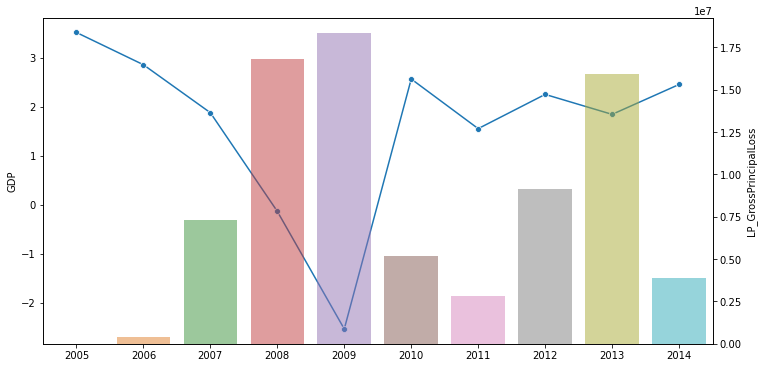

In [21]:
df_closed['Year'] = df_closed['ClosedMaxDate'].dt.year
df_closed = df_closed.merge(mac,how='inner', on=['Year'] )

df_grouped = df_closed.groupby(by='Year', as_index=False).agg({'LP_GrossPrincipalLoss':'sum', 'GDP':'mean'})

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = df_grouped['GDP'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = df_grouped, x='Year', y='LP_GrossPrincipalLoss', alpha=0.5, ax=ax2)

As we can see above, there are negative correlation between GDP Growth values and total loss of each year except in 2013. We assume the GDP Growth is falling significantly arround 2008 because of the global crisis that affect the ability to complete the loan payment. For now, I don't have any clue what is happening in 2013 (there is Govermental Shutdown by President Barrack Obama) that make an anomaly where GDP growth is high and so does the loss. I will update soon, but this information gives us a picture how macroeconomic will affect the probability of default.

# **Building Model**

## **Define Target Variable**



In [22]:
def is_defaulted(row):
  if row['LoanStatus'] in ('Defaulted','Chargedoff'):
    return 1
  else:
    return 0

df_closed["IsDefaulted"] = df_closed.apply(lambda row:is_defaulted(row), axis=1)
df_closed["IsDefaulted"].value_counts()

0    38604
1    17010
Name: IsDefaulted, dtype: int64

## **Macroeconomic Factors Forecasting**
I will update this segment for timeseries forecasting. For temporary I will use the actual data of the next couple year. But we know that it will be cool if we use the forecasting, right? :)

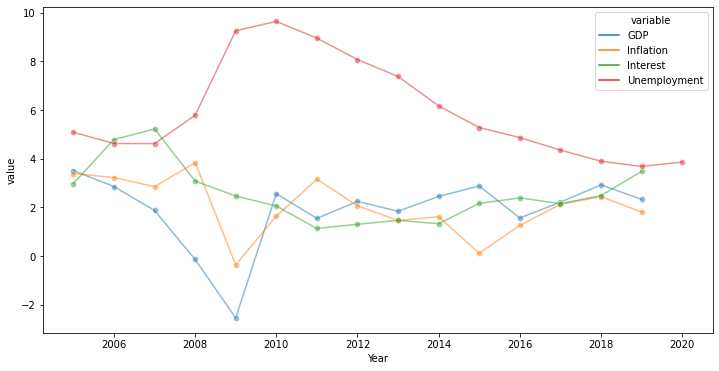

In [23]:
mac_melt = pd.melt(mac, id_vars=['Year'], value_vars=['GDP','Inflation', 'Interest', 'Unemployment'])

plt.figure(figsize=(12,6))
sns.lineplot(data = mac_melt[mac_melt['Year']>2004], 
             x='Year',y='value', hue='variable', 
             marker='o', sort = False, alpha=0.5)

## **Probability of Default Modelling**

In [24]:
df_closed.head()

,LoanStatus,ListingKey,CreditGrade,LoanCurrentDaysDelinquent,Term,ClosedMaxDate,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_GrossPrincipalLoss,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,LoanAges,ClosedAges,ClosedAgesPassed,Year,Country Code,GDP,Inflation,Interest,Unemployment,IsDefaulted
0,Completed,1021339766868145413AB3B,LowGrade,0,36,2009-08-14,0.170000,LowIncome,9425,9425.00,1971.14,0.00,CO,Other,Other,True,2371,702,1669,2009,USA,-2.536757,-0.355546,2.468829,9.254,0
1,Completed,0EE9337825851032864889A,LowGrade,0,36,2009-12-17,0.060000,LowIncome,3001,3001.00,1185.63,0.00,GA,Other,Other,False,2609,1065,1544,2009,USA,-2.536757,-0.355546,2.468829,9.254,0
2,Completed,109D3366077649289619396,HighGrade,0,36,2009-10-22,0.060000,LowIncome,10000,10000.00,2688.13,0.00,NaN,NaN,Other,False,2793,1193,1600,2009,USA,-2.536757,-0.355546,2.468829,9.254,0
3,Chargedoff,0F183387070536545CB7D86,LowGrade,1688,36,2009-11-24,0.590000,HighIncome,23500,14754.94,8756.72,8787.08,CA,Other,Other,False,2510,943,1567,2009,USA,-2.536757,-0.355546,2.468829,9.254,1
4,Chargedoff,0DFE3425061927556BB8A75,HighGrade,1918,36,2009-04-09,0.275947,LowIncome,4800,418.38,266.14,4381.62,CA,Realtor,Other,True,2071,275,1796,2009,USA,-2.536757,-0.355546,2.468829,9.254,1


Probability of Default (PD) can predicted with certain factors:
*   Demographic data: DebtToIncomeRatio, IncomeRange, EmploymentStatus, IsBorrowerHomeowner,
*   Credit related data: IsDefaulted (as target), Term, LoanOriginalAmount, LoanAges, 
*   Macroeconomic factors: GDP, Inflation, Interest, Unemployment

Before we start modelling we need to convert categorical data with one-hot encoding methodd, which are:

*   IncomeRange
*   EmploymentStatus
*   IsBorrowerHomeOwner
*   Term (beacuse only have 3 discrete value: 12, 36, 60 months)











In [25]:
df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [26]:
features = ['DebtToIncomeRatio', 'IncomeRange', 'EmploymentStatus', 'IsBorrowerHomeowner', 
            'Term', 'LoanOriginalAmount', 'LoanAges', 
            'GDP', 'Inflation','Interest','Unemployment']
target = ['IsDefaulted']

df_features = df_closed[features]
cat_subset = pd.get_dummies(df_features[['IncomeRange', 'EmploymentStatus', 'IsBorrowerHomeowner','Term']])
num_subset = df_features.drop(['IncomeRange', 'EmploymentStatus', 'IsBorrowerHomeowner','Term'], axis=1)

df_features = pd.concat([num_subset,cat_subset], axis=1)
df_features.head()

,DebtToIncomeRatio,LoanOriginalAmount,LoanAges,GDP,Inflation,Interest,Unemployment,IsBorrowerHomeowner,Term,IncomeRange_HighIncome,IncomeRange_LowIncome,EmploymentStatus_Employed,EmploymentStatus_Other,EmploymentStatus_Retired
0,0.170000,9425,2371,-2.536757,-0.355546,2.468829,9.254,True,36,0,1,0,1,0
1,0.060000,3001,2609,-2.536757,-0.355546,2.468829,9.254,False,36,0,1,0,1,0
2,0.060000,10000,2793,-2.536757,-0.355546,2.468829,9.254,False,36,0,1,0,1,0
3,0.590000,23500,2510,-2.536757,-0.355546,2.468829,9.254,False,36,1,0,0,1,0
4,0.275947,4800,2071,-2.536757,-0.355546,2.468829,9.254,True,36,0,1,0,1,0


In [27]:
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = model_selection.train_test_split(df_features, df_closed[target], train_size=0.7) 

scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = scaler.transform(X_test)

X_train

,DebtToIncomeRatio,LoanOriginalAmount,LoanAges,GDP,Inflation,Interest,Unemployment,IsBorrowerHomeowner,Term,IncomeRange_HighIncome,IncomeRange_LowIncome,EmploymentStatus_Employed,EmploymentStatus_Other,EmploymentStatus_Retired
0,-0.282205,-0.337821,-1.470001,0.404413,-0.344117,-0.546909,-0.318151,1.059924,-0.129948,1.082260,-1.082260,1.519223,-1.476115,-0.111496
1,-0.016373,-0.050180,-0.556769,0.643990,0.153608,-0.702862,0.144561,-0.943464,-0.129948,-0.923992,0.923992,-0.658231,0.677454,-0.111496
2,-0.282205,-0.625461,1.309565,-2.170211,-1.842946,0.414032,0.934639,-0.943464,-0.129948,-0.923992,0.923992,-0.658231,0.677454,-0.111496
3,0.146679,-1.008982,-0.469557,0.643990,0.153608,-0.702862,0.144561,-0.943464,-0.129948,-0.923992,0.923992,1.519223,-1.476115,-0.111496
4,-0.182132,0.237460,-0.590408,0.643990,0.153608,-0.702862,0.144561,1.059924,-0.129948,1.082260,-1.082260,1.519223,-1.476115,-0.111496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38924,-0.210724,-0.337821,1.133895,-2.170211,-1.842946,0.414032,0.934639,-0.943464,-0.129948,-0.923992,0.923992,-0.658231,0.677454,-0.111496
38925,-0.296501,0.333340,-0.530605,0.643990,0.153608,-0.702862,0.144561,1.059924,-0.129948,1.082260,-1.082260,-0.658231,0.677454,-0.111496
38926,0.046606,-0.625461,-1.254464,0.643990,0.153608,-0.702862,0.144561,-0.943464,-0.129948,-0.923992,0.923992,1.519223,-1.476115,-0.111496
38927,-0.082059,-0.817221,-0.313821,0.643990,0.153608,-0.702862,0.144561,-0.943464,-0.129948,1.082260,-1.082260,-0.658231,0.677454,-0.111496


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


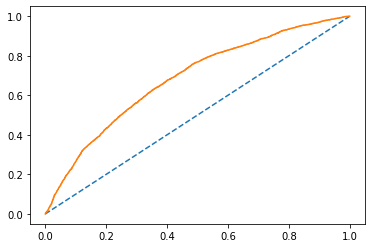

0.6838754291927281

In [28]:
# Logistic Regression fitting
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict_proba(X_test)

from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,tresholds = roc_curve(y_test,y_pred[:,1])
plt.plot([0, 1],[0, 1], linestyle='--')
plt.plot(fpr,tpr)
plt.show()

loss=roc_auc_score(y_test,y_pred[:,1])
loss

In [29]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier()
ran_for.fit(X_train,y_train)
y_pred = ran_for.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


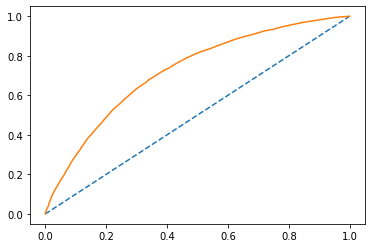

0.7220286795816089

In [30]:
fpr,tpr,tresholds = roc_curve(y_test,y_pred[:,1])
plt.plot([0, 1],[0, 1], linestyle='--')
plt.plot(fpr,tpr)
plt.show()

loss=roc_auc_score(y_test,y_pred[:,1])
loss